# DSCI 552 - Homework 6

### Name : Ashwin Chafale
### Github username : chafale
### USC-ID : 1990624801

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

### 1 (a) Import [APS Training Set](https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks)

# Tree Based Methods
## 1 (b) Data Preparation

#### APS Training Data

In [2]:
df_tngTree_original = pd.read_csv('../Data/aps_failure_training_set.csv', header=14)
df_tngTree_original.head()

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg   76698     na  2130706438    280      0      0      0      0      0   
1   neg   33058     na           0     na      0      0      0      0      0   
2   neg   41040     na         228    100      0      0      0      0      0   
3   neg      12      0          70     66      0     10      0      0      0   
4   neg   60874     na        1368    458      0      0      0      0      0   

   ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008 ee_009 ef_000  \
0  ...  1240520  493384  721044  469792  339156  157956   73224      0      0   
1  ...   421400  178064  293306  245416  133654   81140   97576   1500      0   
2  ...   277378  159812  423992  409564  320746  158022   95128    514      0   
3  ...      240      46      58      44      10       0       0      0      4   
4  ...   622012  229790  405298  347188  286954  311560  433954   1218      0   

  eg_000  
0      0  
1      0  
2      0  
3     32  
4      0  

[5 rows x 171 columns]

#### APS Test Set

In [3]:
df_testTree_original = pd.read_csv('../Data/aps_failure_test_set.csv', header=14)
df_testTree_original.head()

class  aa_000 ab_000 ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  ...  \
0   neg      60      0     20     12      0      0      0      0      0  ...   
1   neg      82      0     68     40      0      0      0      0      0  ...   
2   neg   66002      2    212    112      0      0      0      0      0  ...   
3   neg   59816     na   1010    936      0      0      0      0      0  ...   
4   neg    1814     na    156    140      0      0      0      0      0  ...   

   ee_002  ee_003  ee_004  ee_005   ee_006  ee_007  ee_008 ee_009 ef_000  \
0    1098     138     412     654       78      88       0      0      0   
1    1068     276    1620     116       86     462       0      0      0   
2  495076  380368  440134  269556  1315022  153680     516      0      0   
3  540820  243270  483302  485332   431376  210074  281662   3232      0   
4    7646    4144   18466   49782     3176     482      76      0      0   

  eg_000  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 171 columns]

### 1 (b) i. Data Imputation

#### Data Imputation:  Training Set
The output of False from the dataframe below indicates that we have successfully replaced all missing values with the mean. the subsequent dataframe shows a snapshot of the resultant dataframe.

In [4]:
df_tngTree = df_tngTree_original.copy()
df_tngTree.replace({'na':np.nan}, inplace=True)
df_tngTree.iloc[:,1:] = df_tngTree.iloc[:,1:].astype(float)
df_tngTree = df_tngTree.fillna(df_tngTree.mean(skipna=True))
df_tngTree.isna().any().any()

False

In [5]:
df_tngTree.head()

class   aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0   neg  76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0   
1   neg  33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2   neg  41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0   
3   neg     12.0  0.000000  7.000000e+01      66.000000     0.0    10.0   
4   neg  60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0   

   ag_000  ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee_005  \
0     0.0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0   
1     0.0     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0   
2     0.0     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0   
3     0.0     0.0     0.0  ...      240.0      46.0      58.0      44.0   
4     0.0     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0   

     ee_006    ee_007    ee_008  ee_009  ef_000  eg_000  
0  339156.0  157956.0   73224.0     0.0     0.0     0.0  
1  133654.0   81140.0   97576.0  1500.0     0.0     0.0  
2  320746.0  158022.0   95128.0   514.0     0.0     0.0  
3      10.0       0.0       0.0     0.0     4.0    32.0  
4  286954.0  311560.0  433954.0  1218.0     0.0     0.0  

[5 rows x 171 columns]

#### Data Imputation:  Test Set
The output of False from the dataframe below indicates that we have successfully replaced all missing values with the mean. the subsequent dataframe shows a snapshot of the resultant dataframe.

In [6]:
df_testTree = df_testTree_original.copy()
df_testTree.replace({'na':np.nan}, inplace=True)
df_testTree.iloc[:,1:] = df_testTree.iloc[:,1:].astype(float)
df_testTree = df_testTree.fillna(df_testTree.mean(skipna=True))
df_testTree.isna().any().any()

False

In [7]:
df_testTree.head()

class   aa_000    ab_000  ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   neg     60.0  0.000000    20.0    12.0     0.0     0.0     0.0     0.0   
1   neg     82.0  0.000000    68.0    40.0     0.0     0.0     0.0     0.0   
2   neg  66002.0  2.000000   212.0   112.0     0.0     0.0     0.0     0.0   
3   neg  59816.0  0.772065  1010.0   936.0     0.0     0.0     0.0     0.0   
4   neg   1814.0  0.772065   156.0   140.0     0.0     0.0     0.0     0.0   

   ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_006    ee_007  \
0     0.0  ...    1098.0     138.0     412.0     654.0       78.0      88.0   
1     0.0  ...    1068.0     276.0    1620.0     116.0       86.0     462.0   
2     0.0  ...  495076.0  380368.0  440134.0  269556.0  1315022.0  153680.0   
3     0.0  ...  540820.0  243270.0  483302.0  485332.0   431376.0  210074.0   
4     0.0  ...    7646.0    4144.0   18466.0   49782.0     3176.0     482.0   

     ee_008  ee_009  ef_000  eg_000  
0       0.0     0.0     0.0     0.0  
1       0.0     0.0     0.0     0.0  
2     516.0     0.0     0.0     0.0  
3  281662.0  3232.0     0.0     0.0  
4      76.0     0.0     0.0     0.0  

[5 rows x 171 columns]

### 1 (b) iii. Correlation Matrix

#### Correlation Matrix:  Training Set

In [8]:
tngTree_corr = df_tngTree.corr()
tngTree_corr.style.background_gradient(cmap='GnBu').set_precision(2)

#### Correlation Matrix:  Test Set

In [9]:
testTree_corr = df_testTree.corr()
testTree_corr.style.background_gradient(cmap='GnBu').set_precision(2)

### 1 (b) ii. Coefficient of Variation

CV = $\frac{s}{m}$, where $s$ = sample standard deviation, and $m$ = sample mean

#### Coefficient of Variation Calculations for the APS Training Set (df_tngTree), and Test Set (df_testTree)

In [10]:
tngTree_mean = df_tngTree.mean(skipna=True)
testTree_mean = df_testTree.mean(skipna=True)
tngTree_std = df_tngTree.std(skipna=True)
testTree_std = df_testTree.std(skipna=True)

tngTree_CV = tngTree_std/tngTree_mean
testTree_CV = testTree_std/testTree_mean

#### Coefficient of Variation:  Training Set

In [11]:
tngTree_CV.head()

aa_000      2.450938
ab_000      2.328400
ac_000      2.169767
ad_000    183.847620
ae_000     23.190937
dtype: float64

#### Coefficient of Variation:  Test Set

In [12]:
testTree_CV.head()

aa_000     7.405254
ab_000     1.598753
ac_000     2.159811
ad_000     3.059255
ae_000    17.984377
dtype: float64

### 1 (b) iv. Pick $\sqrt{170}$ features with highest CV , and make scatter plots and box plots for them.
#### $\sqrt{170}$ features with highest CV:  Training Set

In [13]:
sqrt170 = int(math.sqrt(170))
tngTree_CVsorted = tngTree_CV.sort_values(ascending=False)[:sqrt170]
print('The top {} features in the APS Training Set with the highest CV are: '.format(sqrt170))
print('')
print(tngTree_CVsorted[:int(math.sqrt(170))])

The top 13 features in the APS Training Set with the highest CV are: 

cs_009    235.277605
cf_000    184.233092
co_000    183.949017
ad_000    183.847620
dh_000    114.984991
dj_000    109.647285
ag_000     91.878565
as_000     86.416904
ay_009     83.786063
az_009     76.967978
ak_000     74.526688
au_000     68.160554
ch_000     58.268229
dtype: float64


#### $\sqrt{170}$ features with highest CV:  Test Set

In [14]:
sqrt170 = int(math.sqrt(170))
testTree_CVsorted = testTree_CV.sort_values(ascending=False)[:sqrt170]
print('The top {} features in the APS Test Set with the highest CV are: '.format(sqrt170))
print('')
print(testTree_CVsorted[:int(math.sqrt(170))])

The top 13 features in the APS Test Set with the highest CV are: 

cs_009    124.657832
ak_000     93.713367
au_000     84.533732
as_000     82.363040
df_000     72.762421
cs_008     62.520871
az_009     59.670134
eg_000     57.661381
ch_000     54.853846
ag_000     53.090357
dj_000     51.773472
ef_000     50.690401
dz_000     49.401653
dtype: float64


#### Scatter Plots and Boxplots:  APS Training Set

In viewing the scatter plot of the top $\sqrt{170}$ features with the highest coefficient of variation for the APS training set, we do not see any significant relationships between these particular features. 

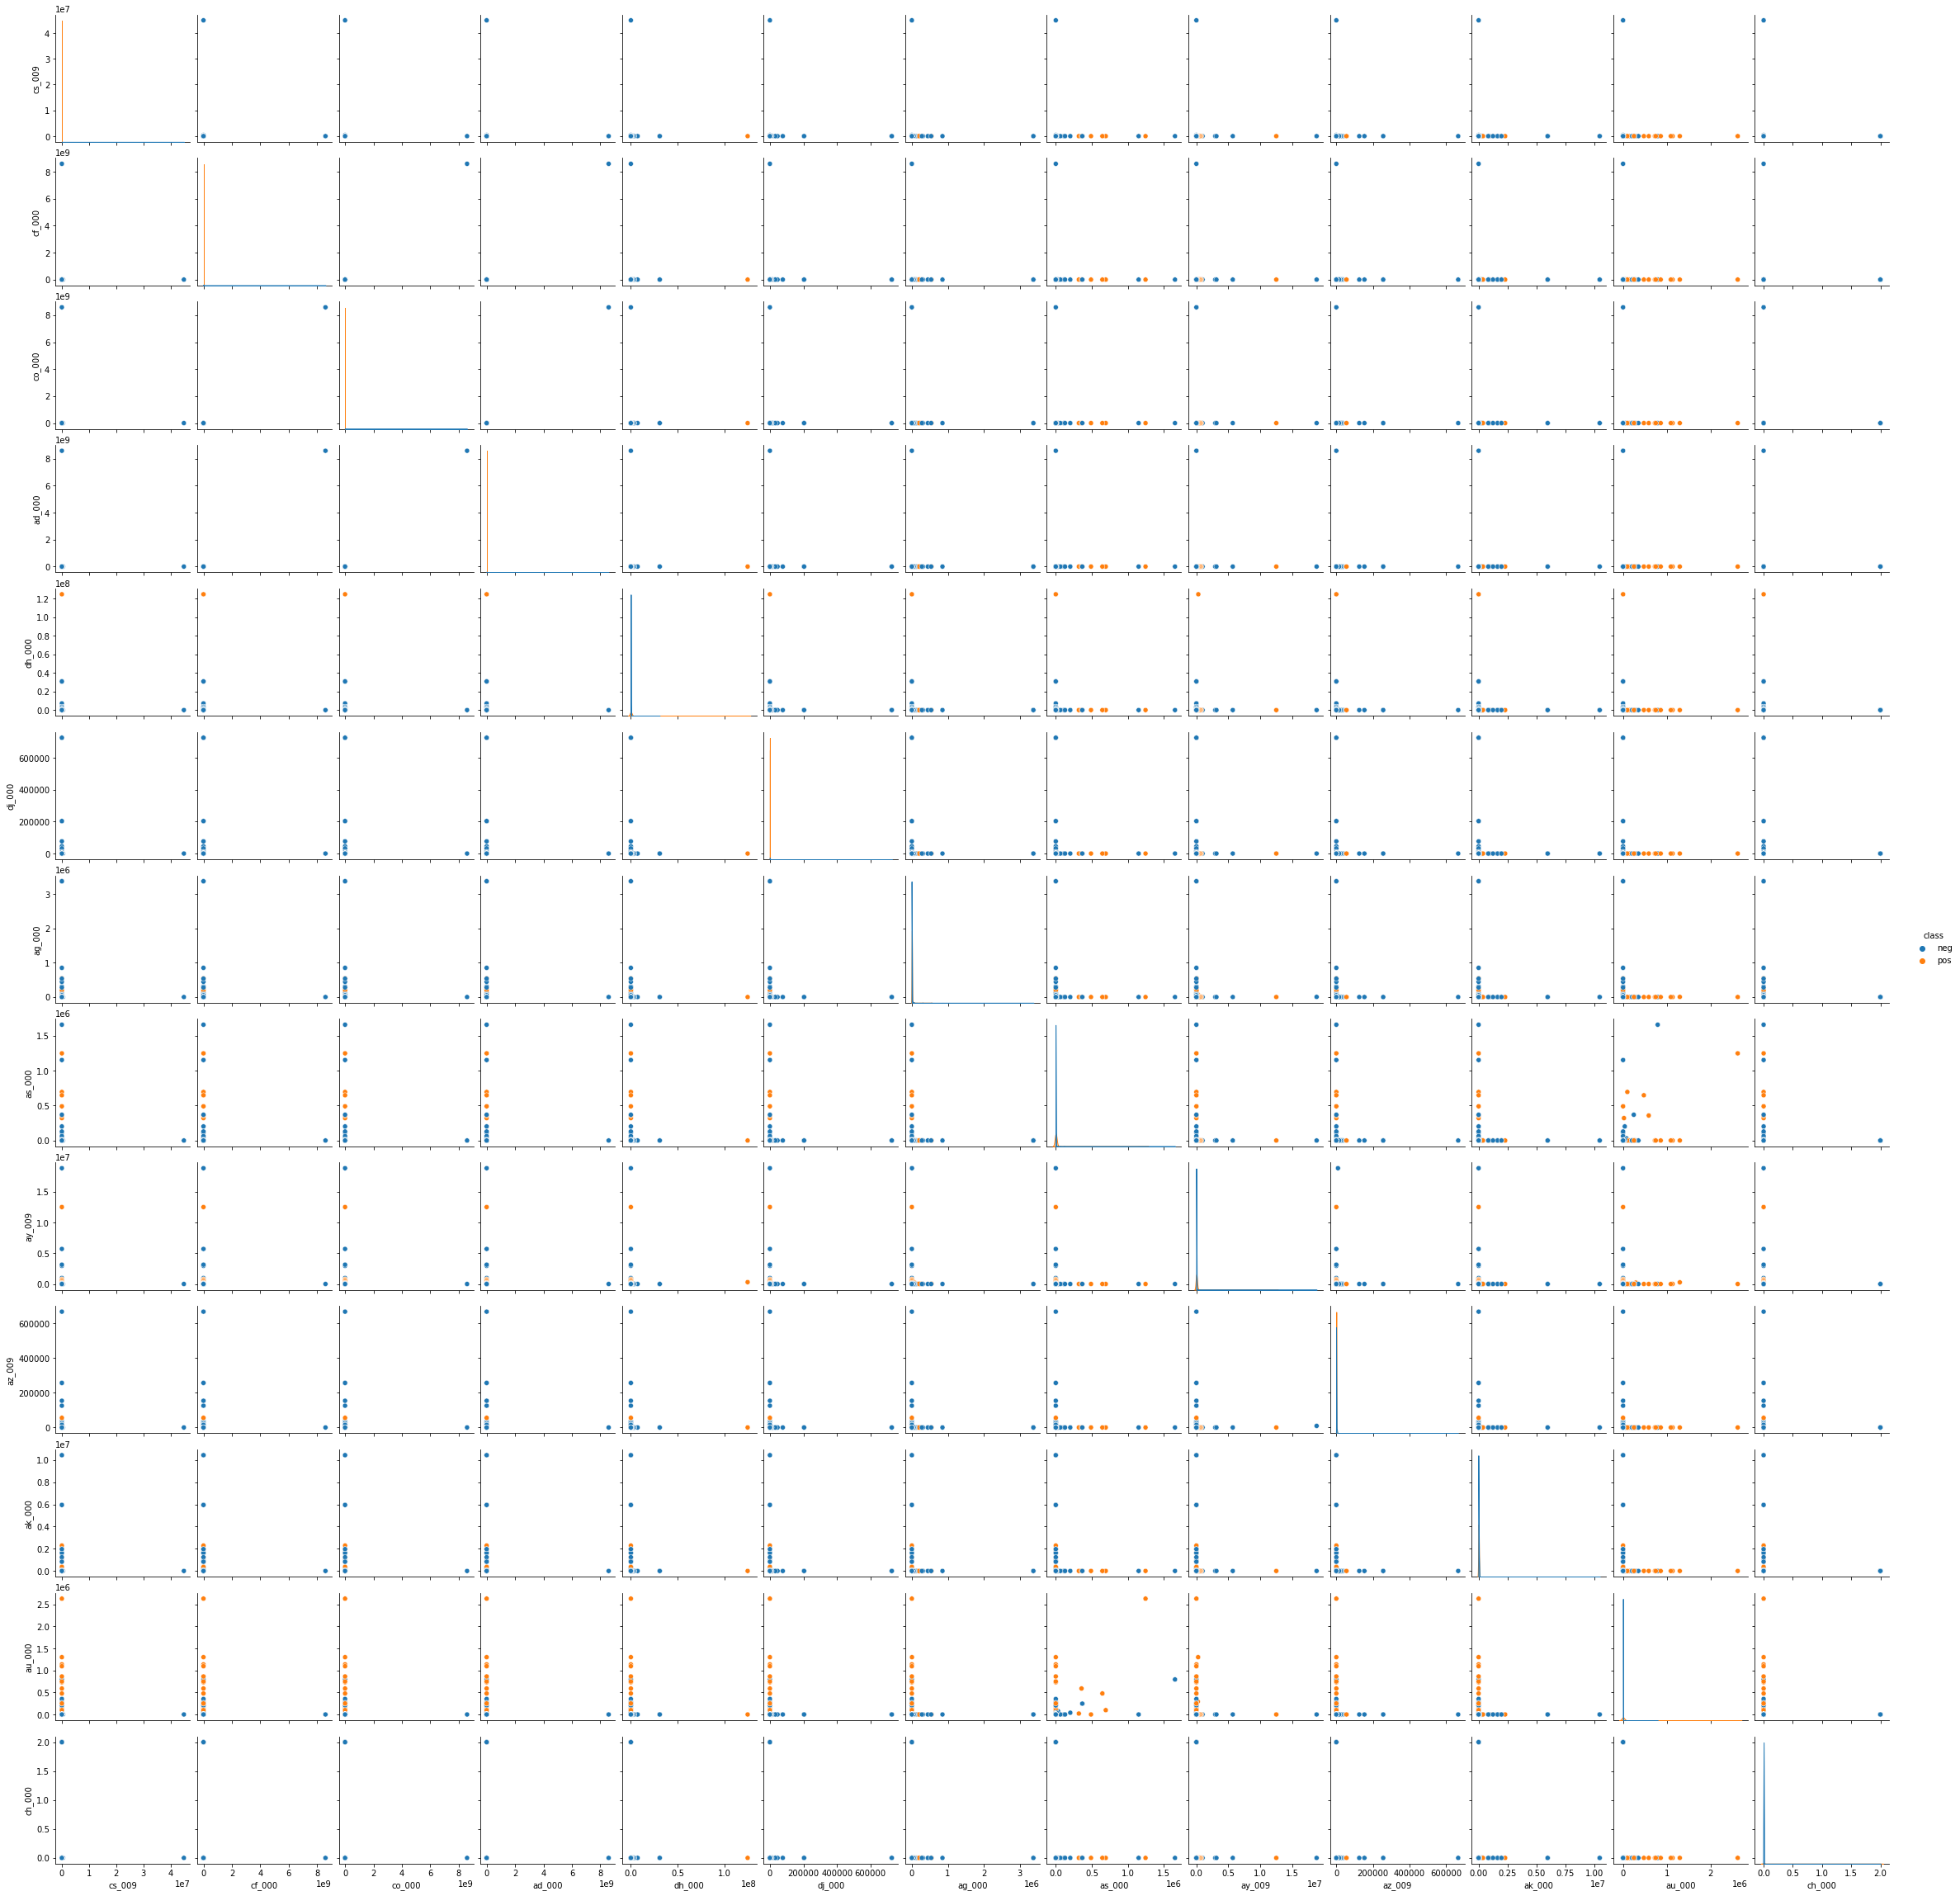

In [15]:
df_tngTree_CVsorted = df_tngTree[tngTree_CVsorted.keys()]
df_tngTree_CVsorted = pd.concat((df_tngTree['class'], df_tngTree_CVsorted), axis=1)
sns.pairplot(df_tngTree_CVsorted, hue='class')

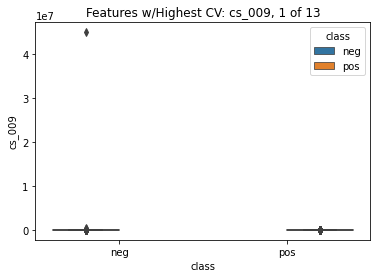

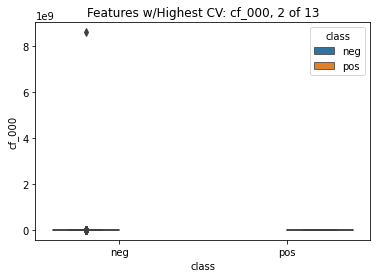

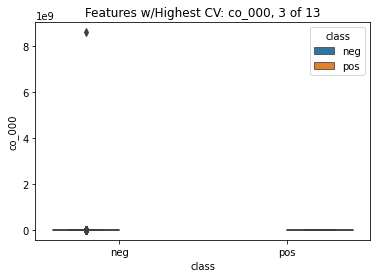

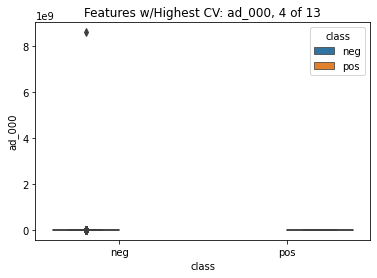

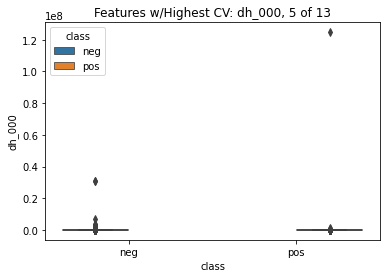

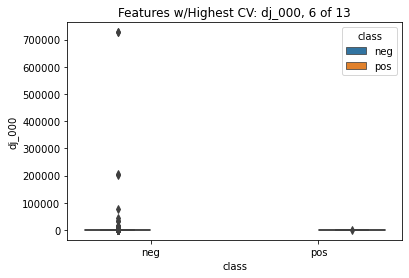

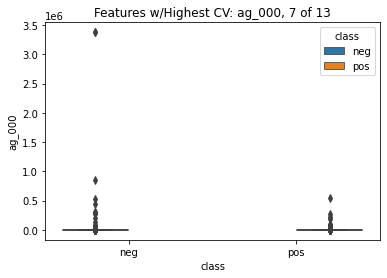

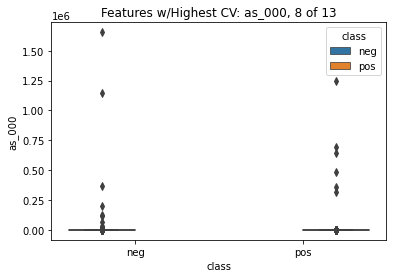

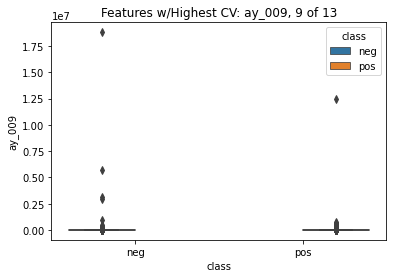

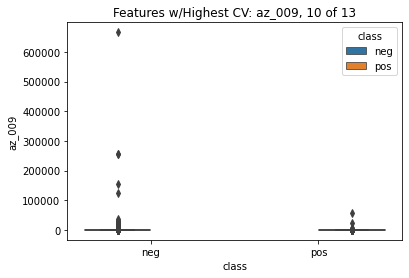

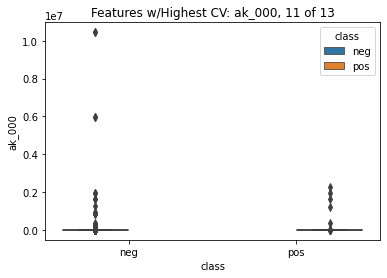

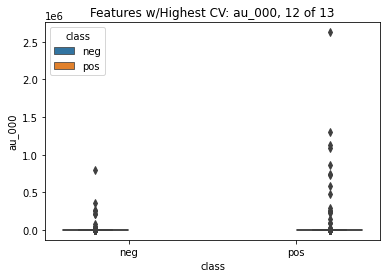

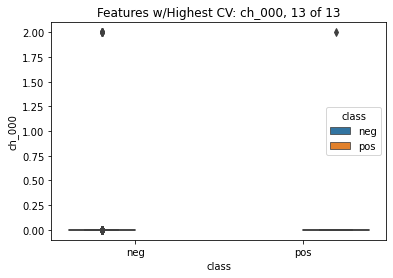

In [16]:
# Boxplot for features with the highest CV
for i, col in enumerate(df_tngTree_CVsorted.columns):
    if i==0:
        pass
    else:
        plt.figure(i)
        sns.boxplot(x='class', y=col, data=df_tngTree_CVsorted, hue='class').set_title('Features w/Highest CV: {}, {} of 13'.format(col,i))

#### Scatter Plots and Boxplots:  APS Test Set

In viewing the scatter plot of the top $\sqrt{170}$ features with the highest coefficient of variation for the APS test set, we do not see any significant relationships between these particular features. 

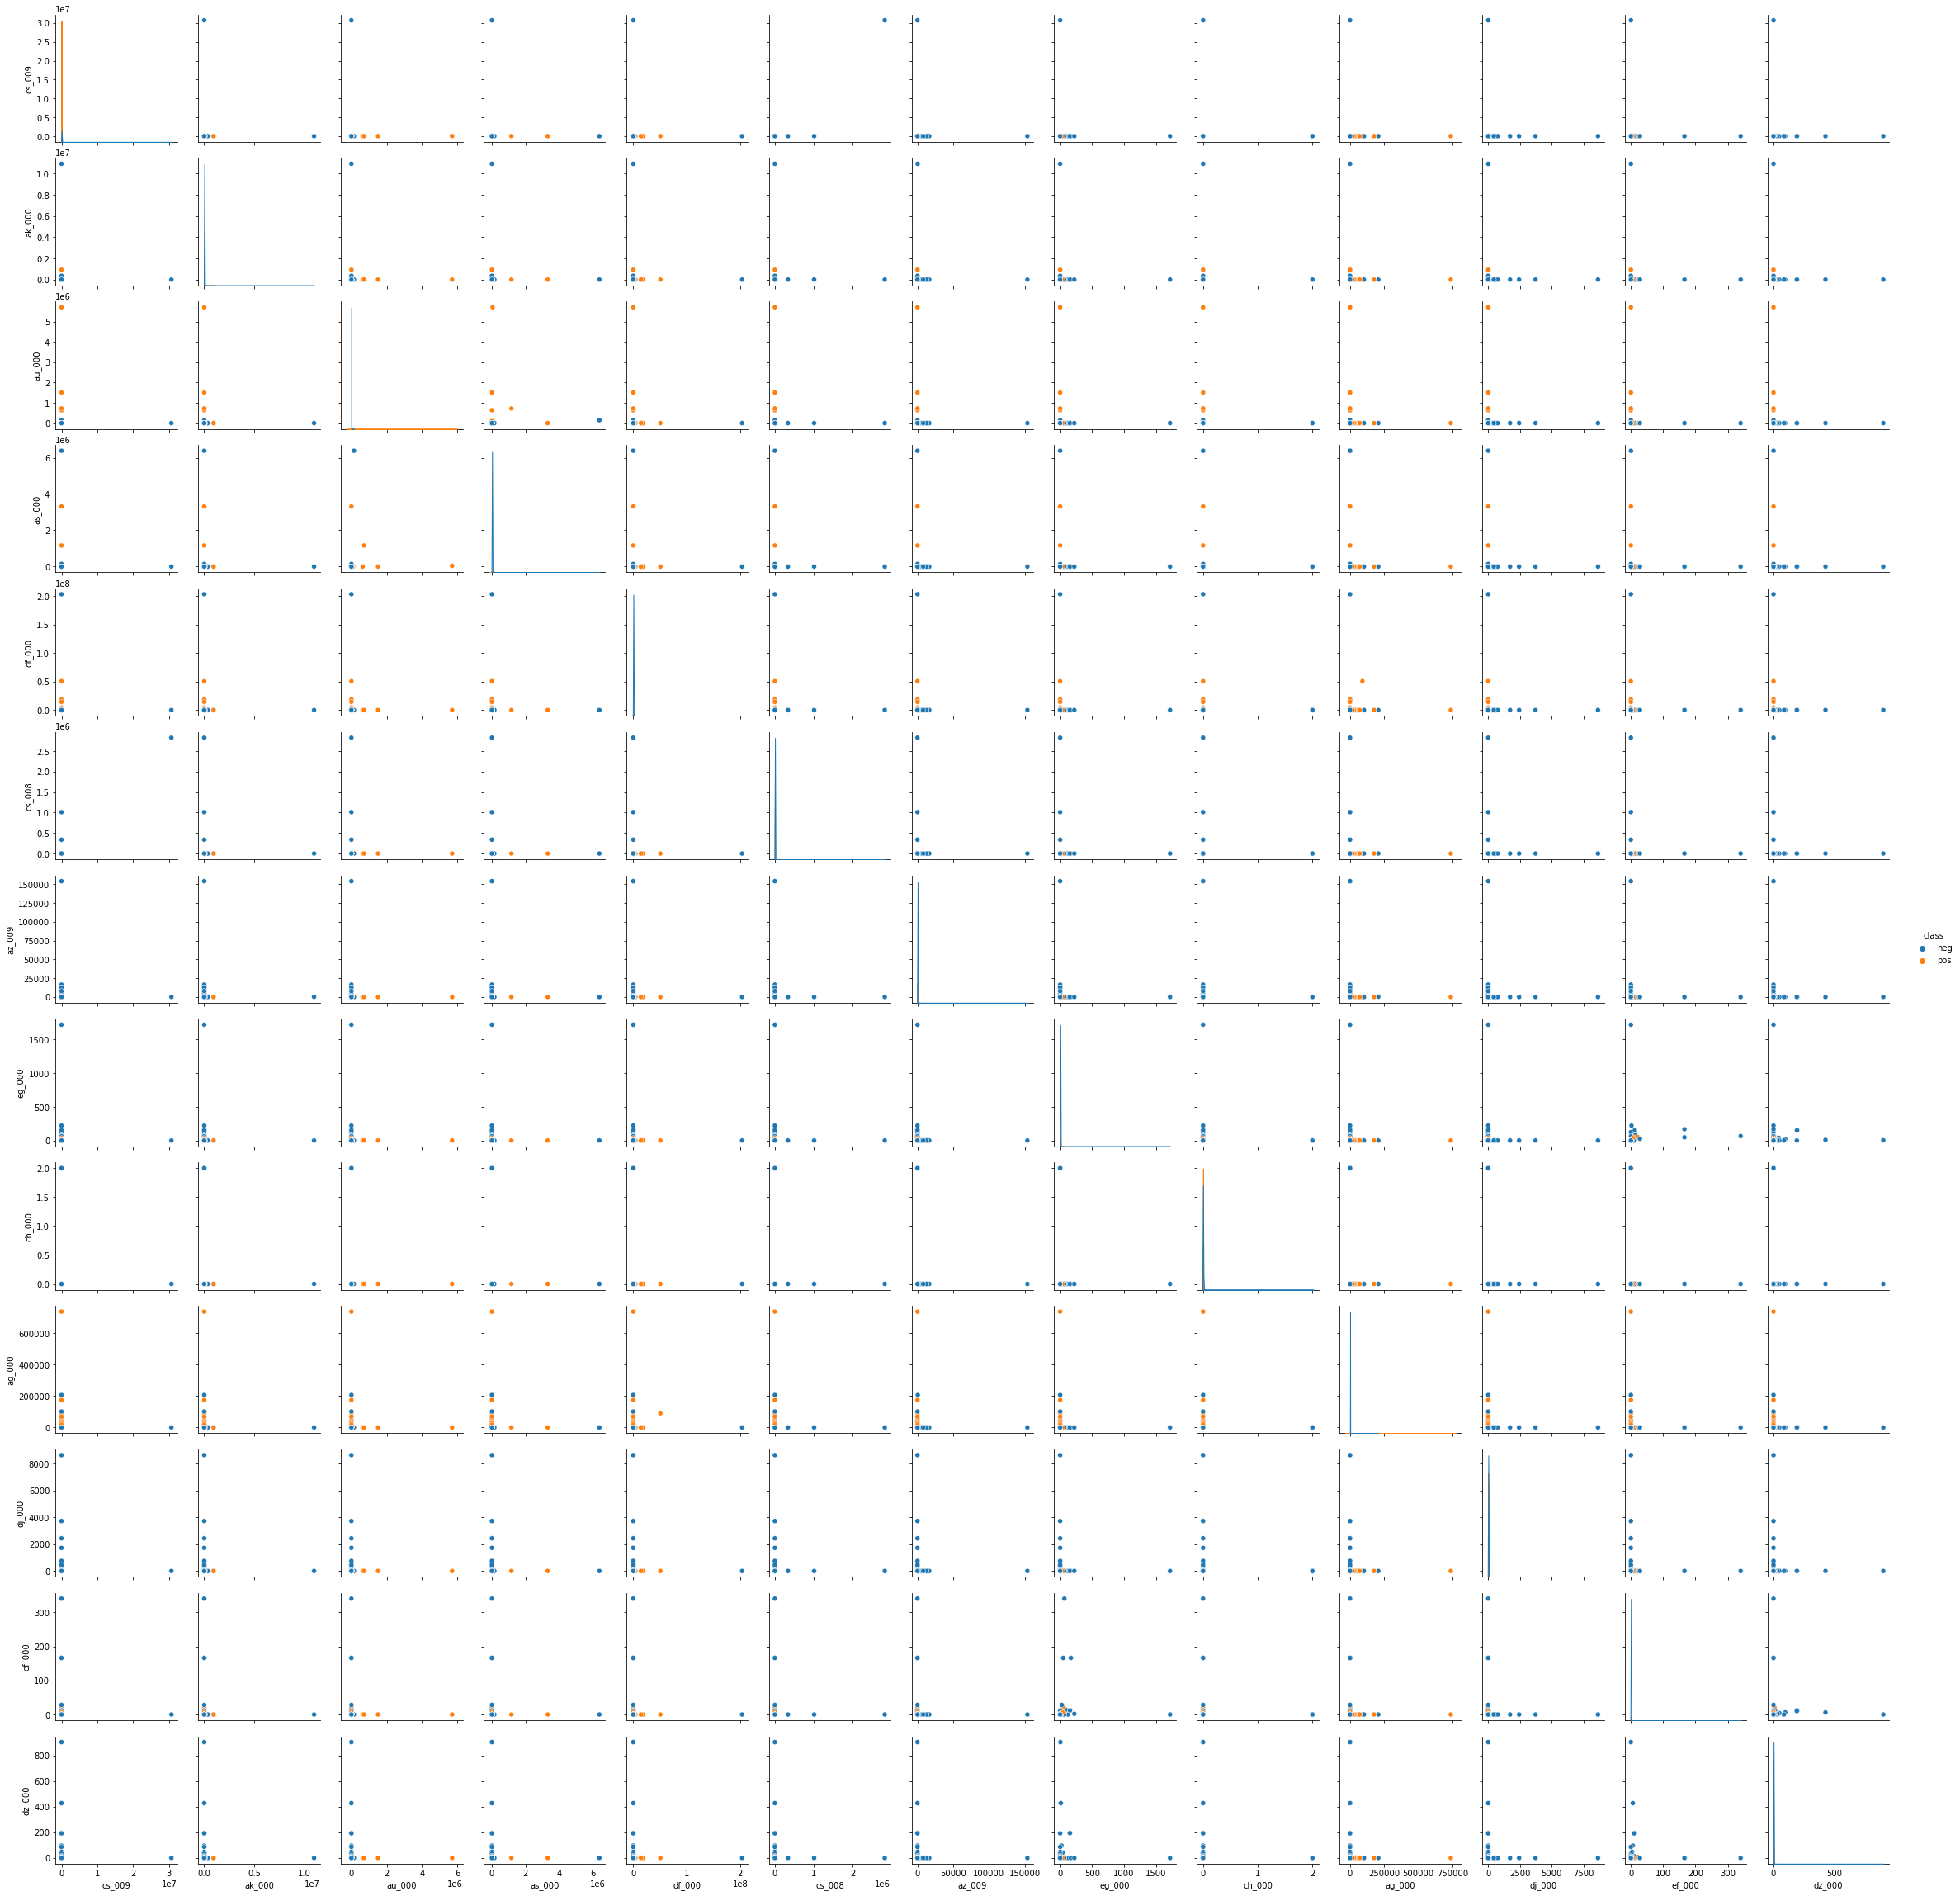

In [17]:
df_testTree_CVsorted = df_testTree[testTree_CVsorted.keys()]
df_testTree_CVsorted = pd.concat((df_testTree['class'], df_testTree_CVsorted), axis=1)
sns.pairplot(df_testTree_CVsorted, hue='class')

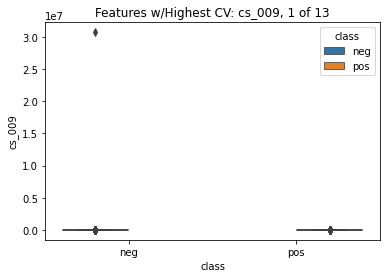

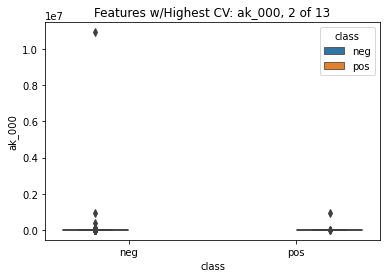

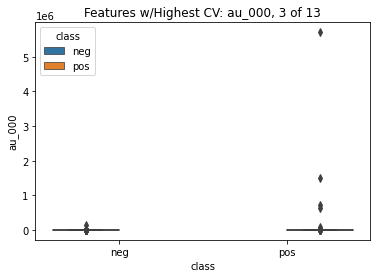

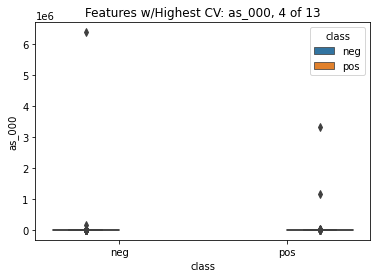

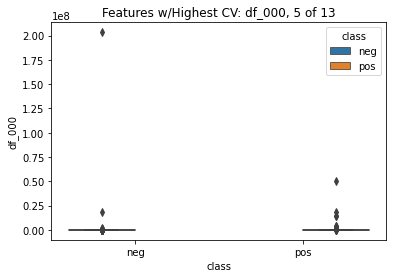

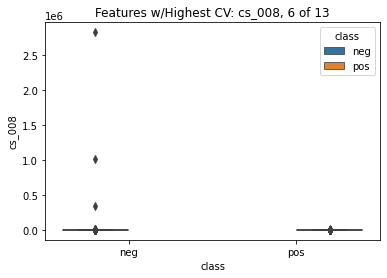

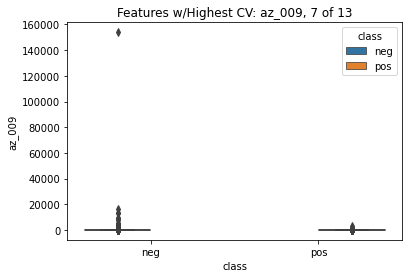

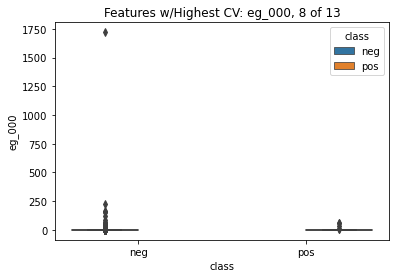

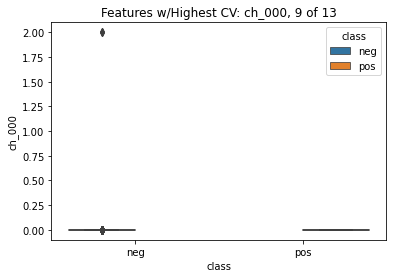

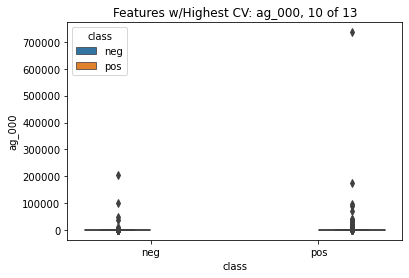

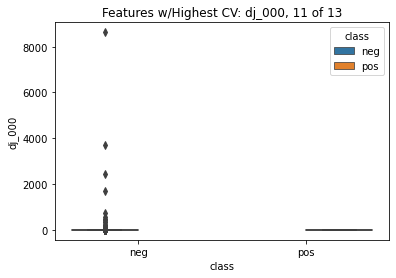

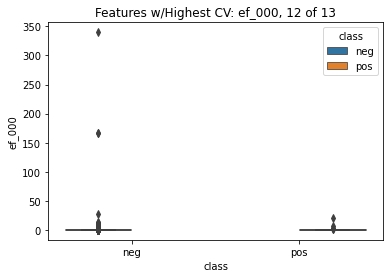

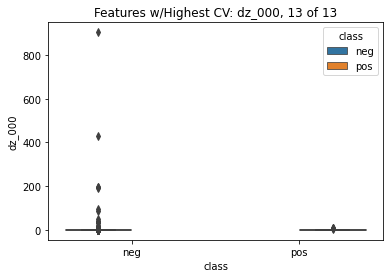

In [18]:
# Boxplot for features with the highest CV
for i, col in enumerate(df_testTree_CVsorted.columns):
    if i==0:
        pass
    else:
        plt.figure(i)
        sns.boxplot(x='class', y=col, data=df_testTree_CVsorted, hue='class').set_title('Features w/Highest CV: {}, {} of 13'.format(col,i))

### 1 (b) v. Class Imbalance
Based on the quantity of positive and negative observations in both the training and test sets, we can see that the data set is imbalanced. As show in the ouputs below, there are only a small number of positive observations (minority class), while there are a significant number of negative observations (majority class) in the training and test sets.

In [19]:
tngNeg = len(df_tngTree[df_tngTree['class']=='neg'])
tngPos = len(df_tngTree[df_tngTree['class']=='pos'])
print('The number of positives is {} and the number of negatives is {} in the APS Training Set.'.format(tngPos, tngNeg))

The number of positives is 1000 and the number of negatives is 59000 in the APS Training Set.


In [20]:
testNeg = len(df_testTree[df_testTree['class']=='neg'])
testPos = len(df_testTree[df_testTree['class']=='pos'])
print('The number of positives is {} and the number of negatives is {} in the APS Test Set.'.format(testPos, testNeg))

The number of positives is 375 and the number of negatives is 15625 in the APS Test Set.


## 1 (c) Random Forest:  Imbalanced Classes

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
# convert 'class' column to binary where 'neg'=0 and 'pos'=1
df_tngTreeBin = df_tngTree.copy()
df_tngTreeBin['class'].replace({'pos':1, 'neg':0}, inplace=True)
df_tngTreeBin.head()

class   aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0      0  76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0   
1      0  33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2      0  41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0   
3      0     12.0  0.000000  7.000000e+01      66.000000     0.0    10.0   
4      0  60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0   

   ag_000  ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee_005  \
0     0.0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0   
1     0.0     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0   
2     0.0     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0   
3     0.0     0.0     0.0  ...      240.0      46.0      58.0      44.0   
4     0.0     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0   

     ee_006    ee_007    ee_008  ee_009  ef_000  eg_000  
0  339156.0  157956.0   73224.0     0.0     0.0     0.0  
1  133654.0   81140.0   97576.0  1500.0     0.0     0.0  
2  320746.0  158022.0   95128.0   514.0     0.0     0.0  
3      10.0       0.0       0.0     0.0     4.0    32.0  
4  286954.0  311560.0  433954.0  1218.0     0.0     0.0  

[5 rows x 171 columns]

In [23]:
# convert 'class' column to binary where 'neg'=0 and 'pos'=1
df_testTreeBin = df_testTree.copy()
df_testTreeBin['class'].replace({'pos':1, 'neg':0}, inplace=True)
df_testTreeBin.head()

class   aa_000    ab_000  ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0      0     60.0  0.000000    20.0    12.0     0.0     0.0     0.0     0.0   
1      0     82.0  0.000000    68.0    40.0     0.0     0.0     0.0     0.0   
2      0  66002.0  2.000000   212.0   112.0     0.0     0.0     0.0     0.0   
3      0  59816.0  0.772065  1010.0   936.0     0.0     0.0     0.0     0.0   
4      0   1814.0  0.772065   156.0   140.0     0.0     0.0     0.0     0.0   

   ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_006    ee_007  \
0     0.0  ...    1098.0     138.0     412.0     654.0       78.0      88.0   
1     0.0  ...    1068.0     276.0    1620.0     116.0       86.0     462.0   
2     0.0  ...  495076.0  380368.0  440134.0  269556.0  1315022.0  153680.0   
3     0.0  ...  540820.0  243270.0  483302.0  485332.0   431376.0  210074.0   
4     0.0  ...    7646.0    4144.0   18466.0   49782.0     3176.0     482.0   

     ee_008  ee_009  ef_000  eg_000  
0       0.0     0.0     0.0     0.0  
1       0.0     0.0     0.0     0.0  
2     516.0     0.0     0.0     0.0  
3  281662.0  3232.0     0.0     0.0  
4      76.0     0.0     0.0     0.0  

[5 rows x 171 columns]

In [24]:
# Create our X and y values for the APS Training and Test Sets
X_tngTree = df_tngTreeBin.iloc[:,1:]
y_tngTree = df_tngTreeBin.loc[:, 'class']
X_testTree = df_testTreeBin.iloc[:,1:]
y_testTree = df_testTreeBin.loc[:, 'class']

# Instantiate model with 100 decision trees
rfc = RandomForestClassifier(n_estimators = 100, oob_score=True, random_state = 19)

# Train the model on training data
rfc.fit(X_tngTree, y_tngTree);

The RFC confusion matrix is:
[[15611    14]
 [  100   275]]
The RFC AUC is: 0.8662186666666667
The misclassification rate for the RFC test set was: 0.7125 %
The misclassification rate for the RFC training set was: 0.0016666666666666668 %
The RFC out of bag error is:  0.005950000000000011
The RFC test error is:  0.007125000000000048


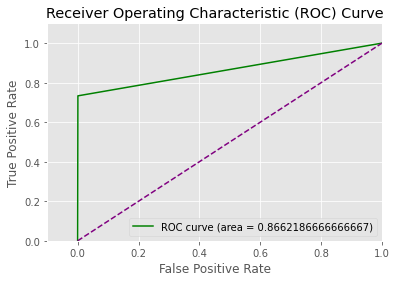

In [25]:
# Use the forest's predict method on the test data
y_predRFC = rfc.predict(X_testTree)
y_predRFC_train = rfc.predict(X_tngTree)

# Calculate the confusion matrix
confusionRFC = confusion_matrix(y_testTree, y_predRFC)
confusionRFC_train = confusion_matrix(y_tngTree, y_predRFC_train)
print('The RFC confusion matrix is:')
print(confusionRFC)

# Determine the ROC characteristics/values
fprRFC, tprRFC, thresholdsRFC = metrics.roc_curve(y_testTree, y_predRFC)
    
# Calculate the AUC
aucRFC = metrics.auc(fprRFC, tprRFC)
print('The RFC AUC is: {}'.format(aucRFC))

# Misclassification for test set
TP = confusionRFC[0][0]
FP = confusionRFC[0][1]
FN = confusionRFC[1][0]
TN = confusionRFC[1][1]
misClass_RFC = (FP+FN)/(TP+FP+FN+TN) * 100
print('The misclassification rate for the RFC test set was: {} %'.format(misClass_RFC))

# Misclassification for test set
TP_tng = confusionRFC_train[0][0]
FP_tng = confusionRFC_train[0][1]
FN_tng = confusionRFC_train[1][0]
TN_tng = confusionRFC_train[1][1]
misClass_RFC_tng = (FP_tng+FN_tng)/(TP_tng+FP_tng+FN_tng+TN_tng) * 100
print('The misclassification rate for the RFC training set was: {} %'.format(misClass_RFC_tng))

#Calculate the out of bag error
oobRFC = 1-rfc.oob_score_
print('The RFC out of bag error is:  {}'.format(oobRFC))

# Calculate the Test Error
test_errorRFC = 1 - metrics.accuracy_score(y_testTree, y_predRFC)
print('The RFC test error is:  {}'.format(test_errorRFC))

plt.style.use('ggplot')
plt.plot(fprRFC, tprRFC, color='green', label='ROC curve (area = {})'.format(aucRFC))
plt.plot([0, 1], [0, 1], color='purple', linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

As we can see in the results of the calculations above, the test error for the random forest was slightly bigger than our Out of Bag error. However, the difference between the test error and the Out of Bag error is marginal and based on these results, the random forest performed fairly well despite the imbalanced classes.

## 1 (d) Random Forest:  Balanced Classes

In [26]:
# Create our X and y values for the APS Training and Test Sets
X_tngTree = df_tngTreeBin.iloc[:,1:]
y_tngTree = df_tngTreeBin.loc[:, 'class']
X_testTree = df_testTreeBin.iloc[:,1:]
y_testTree = df_testTreeBin.loc[:, 'class']

# Instantiate model with 1000 decision trees
rfcBal = RandomForestClassifier(n_estimators = 100, oob_score=True, random_state = 19, class_weight='balanced')

# Train the model on training data
rfcBal.fit(X_tngTree, y_tngTree);

For balanced classes, the RFC confusion matrix is:
[[15612    13]
 [  158   217]]
For balanced classes, the RFC AUC is: 0.7889173333333332
For balanced classes, the misclassification rate for the RFC test set was: 1.06875 %
For balanced classes, the misclassification rate for the RFC training set was: 0.0 %
For balanced classes, the RFC out of bag error is:  0.007933333333333348
For balanced classes, the RFC test error is:  0.010687499999999961


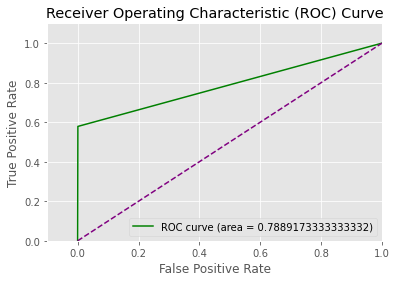

In [27]:
# Use the forest's predict method on the test data
y_predRFCBal = rfcBal.predict(X_testTree)
y_predRFCBal_tng = rfcBal.predict(X_tngTree)

# Calculate the confusion matrix
confusionRFCBal = confusion_matrix(y_testTree, y_predRFCBal)
confusionRFCBal_train = confusion_matrix(y_tngTree, y_predRFCBal_tng)
print('For balanced classes, the RFC confusion matrix is:')
print(confusionRFCBal)

# Determine the ROC characteristics/values
fprRFCBal, tprRFCBal, thresholdsRFCBal = metrics.roc_curve(y_testTree, y_predRFCBal)
    
# Calculate the AUC
aucRFCBal = metrics.auc(fprRFCBal, tprRFCBal)
print('For balanced classes, the RFC AUC is: {}'.format(aucRFCBal))

# Misclassification for test set
TP_Bal = confusionRFCBal[0][0]
FP_Bal = confusionRFCBal[0][1]
FN_Bal = confusionRFCBal[1][0]
TN_Bal = confusionRFCBal[1][1]
misClass_RFCBal = (FP_Bal+FN_Bal)/(TP_Bal+FP_Bal+FN_Bal+TN_Bal) * 100
print('For balanced classes, the misclassification rate for the RFC test set was: {} %'.format(misClass_RFCBal))

# Misclassification for test set
TP_tngBal = confusionRFCBal_train[0][0]
FP_tngBal = confusionRFCBal_train[0][1]
FN_tngBal = confusionRFCBal_train[1][0]
TN_tngBal = confusionRFCBal_train[1][1]
misClass_RFCBal_tng = (FP_tngBal+FN_tngBal)/(TP_tngBal+FP_tngBal+FN_tngBal+TN_tngBal) * 100
print('For balanced classes, the misclassification rate for the RFC training set was: {} %'.format(misClass_RFCBal_tng))

#Calculate the out of bag error
oobRFCBal = 1-rfcBal.oob_score_ 
print('For balanced classes, the RFC out of bag error is:  {}'.format(oobRFCBal))

# Calculate the Test Error
test_errorRFCBal = 1 - metrics.accuracy_score(y_testTree, y_predRFCBal)
print('For balanced classes, the RFC test error is:  {}'.format(test_errorRFCBal))

plt.style.use('ggplot')
plt.plot(fprRFCBal, tprRFCBal, color='green', label='ROC curve (area = {})'.format(aucRFCBal))
plt.plot([0, 1], [0, 1], color='purple', linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

As we can see in the results of the calculations above, the test error for the random forest where we compensated for the class imbalance was slightly bigger than our Out of Bag error. However, the difference between the test error and the Out of Bag error is marginal and based on these results, the random forest performed fairly well.

### Compare the Results of the Random Forest Models

Both of the random forest models performed fairly well with minimal test errors and misclassification rates. From a pure numerical perspective, the random forest model without any compensation for the class imbalance performed slightly better than the random forest model with compensation for the class imbalance as seen in the smaller error values and misclassification rates. 

## 1 (e) XGBoost and Model Trees

In [28]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

### 1 (e) Train the XGBoost Model Tree and Evaluate Using 10-Folds Cross-Validation (Imbalanced Classes)
I have used 10-folds cross-validation using GridSearchCV

In [32]:
X_tngTree = df_tngTreeBin.iloc[:,1:]
y_tngTree = df_tngTreeBin.loc[:, 'class']
X_testTree = df_testTreeBin.iloc[:,1:]
y_testTree = df_testTreeBin.loc[:, 'class']

# Instantiate the XGBoost model
xgbClassifier =  xgb.XGBClassifier(booster="gblinear", eval_metric="logloss", use_label_encoder=False)

# Define the parameters to tune using cross-validation with GridSearchCV
params = {'reg_alpha':[ 1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 0.025, 0.05, 0.1, 0.75, 0.5, 0.75, 1, 1.0001, 1.01, 1.025, 1.05, 1.075, 1.1, 1.125, 1.15, 1.175, 1.2, 2, 3, 4, 5]
}

# Use GridSearchCV to find the best alpha using cross-validation
xgb_gridSearchCV = GridSearchCV(estimator=xgbClassifier, param_grid=params, scoring='accuracy', cv=10, n_jobs=4)
xgb_gridSearchCV.fit(X_tngTree, y_tngTree)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster='gblinear',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=n...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                           

In [33]:
print('The best alpha found using cross-validation is: {}'.format(xgb_gridSearchCV.best_params_))

The best alpha found using cross-validation is: {'reg_alpha': 0.01}


In [36]:
print('The cross-validation score is: {}'.format(xgb_gridSearchCV.best_score_))

The cross-validation score is: 0.9916


In [37]:
# fit the model for alpha = 0.01
params = {'reg_alpha':[0.01]}
xgb_gridSearchCV_best_alpha = GridSearchCV(estimator=xgbClassifier, param_grid=params, scoring='accuracy', cv=10, n_jobs=4)
xgb_gridSearchCV_best_alpha.fit(X_tngTree, y_tngTree)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster='gblinear',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
   

In [39]:
xgb_gridSearchCV_best_alpha.cv_results_

{'mean_fit_time': array([3.43709054]),
 'std_fit_time': array([0.91987274]),
 'mean_score_time': array([0.04899285]),
 'std_score_time': array([0.02696147]),
 'param_reg_alpha': masked_array(data=[0.01],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'reg_alpha': 0.01}],
 'split0_test_score': array([0.9905]),
 'split1_test_score': array([0.9915]),
 'split2_test_score': array([0.99216667]),
 'split3_test_score': array([0.99216667]),
 'split4_test_score': array([0.9935]),
 'split5_test_score': array([0.99016667]),
 'split6_test_score': array([0.99133333]),
 'split7_test_score': array([0.99216667]),
 'split8_test_score': array([0.99016667]),
 'split9_test_score': array([0.99233333]),
 'mean_test_score': array([0.9916]),
 'std_test_score': array([0.00102524]),
 'rank_test_score': array([1], dtype=int32)}

#### Confusion Matrix, ROC, and AUC
The printouts below provide the calculations and statistics for the Logisitc Model Tree with 10-folds cross-validation.

For imbalanced classes, the RFC confusion matrix is:
[[15573    52]
 [  119   256]]
For imbalanced classes, the RFC AUC is: 0.8396693333333333


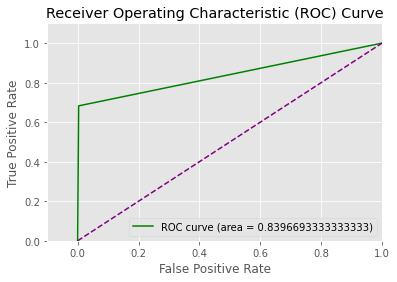

In [38]:
# Use the forest's predict method on the test data
y_pred_test = xgb_gridSearchCV_best_alpha.predict(X_testTree)
y_pred_tng = xgb_gridSearchCV_best_alpha.predict(X_tngTree)

# Calculate the confusion matrix
confusionRFCBal = confusion_matrix(y_testTree, y_pred_test)
confusionRFCBal_train = confusion_matrix(y_tngTree, y_pred_tng)
print('For imbalanced classes, the RFC confusion matrix is:')
print(confusionRFCBal)

# Determine the ROC characteristics/values
fprRFCBal, tprRFCBal, _ = metrics.roc_curve(y_testTree, y_pred_test)

# Calculate the AUC
aucRFCBal = metrics.auc(fprRFCBal, tprRFCBal)
print('For imbalanced classes, the RFC AUC is: {}'.format(aucRFCBal))

plt.style.use('ggplot')
plt.plot(fprRFCBal, tprRFCBal, color='green', label='ROC curve (area = {})'.format(aucRFCBal))
plt.plot([0, 1], [0, 1], color='purple', linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Compare the Training and Test Error

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Training and Test mean-absolute-error
tng_mae = mean_absolute_error(y_tngTree, y_pred_tng)
test_mae = mean_absolute_error(y_testTree, y_pred_test)

# Training and Test mean-squared-error
tng_mse = mean_squared_error(y_tngTree, y_pred_tng)
test_mse = mean_absolute_error(y_testTree, y_pred_test)

print("For imbalanced data Training Mean Absolute Error : ", tng_mae)
print("For imbalanced data Test Mean Absolute Error : ", test_mae)
print("For imbalanced data Training Mean Squared Error : ", tng_mse)
print("For imbalanced data Test Mean Squared Error : ", test_mse)

For imbalanced data Training Mean Absolute Error :  0.007333333333333333
For imbalanced data Test Mean Absolute Error :  0.0106875
For imbalanced data Training Mean Squared Error :  0.007333333333333333
For imbalanced data Test Mean Squared Error :  0.0106875


After training a XGBoost Model Tree using 10-folds cross-validation on the imbalanced data set, we found our training mean absolute error and our training root mean squared error to be 0.007. And test mean absolute error and training root mean squared error to be 0.0107. Although these values increased, the increase was minimal and is acceptable for our data.

### 1 (f) Train the XBBoost Model Tree and Evaluate Using 10-Folds Cross-Validation (Balanced Classes)
We will now compensate for the imbalanced classes in our data set and train another Logistic Model Tree using 5-folds cross-validation.

#### Data Preprocessing:  SMOTE
To compensate for the imbalanced classes, we are asked to use an upsampling technique on our data set called SMOTE (Synthetic Minority Over-sampling Technique). For this, we will use imbalanced-learn's SMOTE class to upsample the minority class ('pos').

In [42]:
# Create our X and y values for the APS Training and Test Sets
X_tngTree = df_tngTree.iloc[:,1:]
y_tngTree = df_tngTree.loc[:, 'class']
X_testTree = df_testTree.iloc[:,1:]
y_testTree = df_testTree.loc[:, 'class']

# Resample the Training Set with SMOTE to handle the imbalanced classes
sm = SMOTE(random_state=19)
X_tngTreeResampled, y_tngTreeResampled = sm.fit_resample(X_tngTree, y_tngTree)
X_testTreeResampled, y_testTreeResampled = sm.fit_resample(X_testTree, y_testTree)

In [43]:
X_tngTreeResampled = pd.DataFrame(X_tngTreeResampled, columns = df_tngTree.iloc[:,1:].columns)
y_tngTreeResampled = pd.DataFrame(y_tngTreeResampled, columns = ['class'])
df_tngTreeSMOTE = pd.concat([y_tngTreeResampled, X_tngTreeResampled], axis=1)
df_tngTreeSMOTE.head()

class   aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0   neg  76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0   
1   neg  33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2   neg  41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0   
3   neg     12.0  0.000000  7.000000e+01      66.000000     0.0    10.0   
4   neg  60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0   

   ag_000  ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee_005  \
0     0.0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0   
1     0.0     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0   
2     0.0     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0   
3     0.0     0.0     0.0  ...      240.0      46.0      58.0      44.0   
4     0.0     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0   

     ee_006    ee_007    ee_008  ee_009  ef_000  eg_000  
0  339156.0  157956.0   73224.0     0.0     0.0     0.0  
1  133654.0   81140.0   97576.0  1500.0     0.0     0.0  
2  320746.0  158022.0   95128.0   514.0     0.0     0.0  
3      10.0       0.0       0.0     0.0     4.0    32.0  
4  286954.0  311560.0  433954.0  1218.0     0.0     0.0  

[5 rows x 171 columns]

In [44]:
X_testTreeResampled = pd.DataFrame(X_testTreeResampled, columns = df_testTree.iloc[:,1:].columns)
y_testTreeResampled = pd.DataFrame(y_testTreeResampled, columns = ['class'])
df_testTreeSMOTE = pd.concat([y_testTreeResampled, X_testTreeResampled], axis=1)
df_testTreeSMOTE.head()

class   aa_000    ab_000  ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0   neg     60.0  0.000000    20.0    12.0     0.0     0.0     0.0     0.0   
1   neg     82.0  0.000000    68.0    40.0     0.0     0.0     0.0     0.0   
2   neg  66002.0  2.000000   212.0   112.0     0.0     0.0     0.0     0.0   
3   neg  59816.0  0.772065  1010.0   936.0     0.0     0.0     0.0     0.0   
4   neg   1814.0  0.772065   156.0   140.0     0.0     0.0     0.0     0.0   

   ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_006    ee_007  \
0     0.0  ...    1098.0     138.0     412.0     654.0       78.0      88.0   
1     0.0  ...    1068.0     276.0    1620.0     116.0       86.0     462.0   
2     0.0  ...  495076.0  380368.0  440134.0  269556.0  1315022.0  153680.0   
3     0.0  ...  540820.0  243270.0  483302.0  485332.0   431376.0  210074.0   
4     0.0  ...    7646.0    4144.0   18466.0   49782.0     3176.0     482.0   

     ee_008  ee_009  ef_000  eg_000  
0       0.0     0.0     0.0     0.0  
1       0.0     0.0     0.0     0.0  
2     516.0     0.0     0.0     0.0  
3  281662.0  3232.0     0.0     0.0  
4      76.0     0.0     0.0     0.0  

[5 rows x 171 columns]

In [45]:
# Create our X and y values for the APS Training and Test Sets
X_tngTreeBin = df_tngTreeBin.iloc[:,1:]
y_tngTreeBin = df_tngTreeBin.loc[:, 'class']
X_testTreeBin = df_testTreeBin.iloc[:,1:]
y_testTreeBin = df_testTreeBin.loc[:, 'class']

# Resample the Training Set with SMOTE to handle the imbalanced classes
sm = SMOTE(random_state=19)
X_tngTreeBinResampled, y_tngTreeBinResampled = sm.fit_resample(X_tngTreeBin, y_tngTreeBin)
X_testTreeBinResampled, y_testTreeBinResampled = sm.fit_resample(X_testTreeBin, y_testTreeBin)

In [46]:
X_tngTreeBinResampled = pd.DataFrame(X_tngTreeBinResampled, columns = df_tngTreeBin.iloc[:,1:].columns)
y_tngTreeBinResampled = pd.DataFrame(y_tngTreeBinResampled, columns = ['class'])
df_tngTreeBinSMOTE = pd.concat([y_tngTreeBinResampled, X_tngTreeBinResampled], axis=1)
df_tngTreeBinSMOTE.head()

class   aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0      0  76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0   
1      0  33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2      0  41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0   
3      0     12.0  0.000000  7.000000e+01      66.000000     0.0    10.0   
4      0  60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0   

   ag_000  ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee_005  \
0     0.0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0   
1     0.0     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0   
2     0.0     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0   
3     0.0     0.0     0.0  ...      240.0      46.0      58.0      44.0   
4     0.0     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0   

     ee_006    ee_007    ee_008  ee_009  ef_000  eg_000  
0  339156.0  157956.0   73224.0     0.0     0.0     0.0  
1  133654.0   81140.0   97576.0  1500.0     0.0     0.0  
2  320746.0  158022.0   95128.0   514.0     0.0     0.0  
3      10.0       0.0       0.0     0.0     4.0    32.0  
4  286954.0  311560.0  433954.0  1218.0     0.0     0.0  

[5 rows x 171 columns]

In [47]:
X_testTreeBinResampled = pd.DataFrame(X_testTreeBinResampled, columns = df_testTreeBin.iloc[:,1:].columns)
y_testTreeBinResampled = pd.DataFrame(y_testTreeBinResampled, columns = ['class'])
df_testTreeBinSMOTE = pd.concat([y_testTreeBinResampled, X_testTreeBinResampled], axis=1)
df_testTreeBinSMOTE.head()

class   aa_000    ab_000  ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0      0     60.0  0.000000    20.0    12.0     0.0     0.0     0.0     0.0   
1      0     82.0  0.000000    68.0    40.0     0.0     0.0     0.0     0.0   
2      0  66002.0  2.000000   212.0   112.0     0.0     0.0     0.0     0.0   
3      0  59816.0  0.772065  1010.0   936.0     0.0     0.0     0.0     0.0   
4      0   1814.0  0.772065   156.0   140.0     0.0     0.0     0.0     0.0   

   ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_006    ee_007  \
0     0.0  ...    1098.0     138.0     412.0     654.0       78.0      88.0   
1     0.0  ...    1068.0     276.0    1620.0     116.0       86.0     462.0   
2     0.0  ...  495076.0  380368.0  440134.0  269556.0  1315022.0  153680.0   
3     0.0  ...  540820.0  243270.0  483302.0  485332.0   431376.0  210074.0   
4     0.0  ...    7646.0    4144.0   18466.0   49782.0     3176.0     482.0   

     ee_008  ee_009  ef_000  eg_000  
0       0.0     0.0     0.0     0.0  
1       0.0     0.0     0.0     0.0  
2     516.0     0.0     0.0     0.0  
3  281662.0  3232.0     0.0     0.0  
4      76.0     0.0     0.0     0.0  

[5 rows x 171 columns]

### Train the XGBoost Model Tree and Evaluate Using 10-Folds Cross-Validation (Balanced Classes)


In [50]:
X_tngTree_smote = df_tngTreeBinSMOTE.iloc[:,1:]
y_tngTree_smote = df_tngTreeBinSMOTE.loc[:, 'class']
X_testTree_smote = df_testTreeBinSMOTE.iloc[:,1:]
y_testTree_smote = df_testTreeBinSMOTE.loc[:, 'class']

# Instantiate the XGBoost model
xgbClassifier_smote =  xgb.XGBClassifier(booster="gblinear", eval_metric="logloss", use_label_encoder=False)

# Define the parameters to tune using cross-validation with GridSearchCV
params = {'reg_alpha':[ 1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 0.025, 0.05, 0.1, 0.75, 0.5, 0.75, 1, 1.0001, 1.01, 1.025, 1.05, 1.075, 1.1, 1.125, 1.15, 1.175, 1.2, 2, 3, 4, 5]
}

# Use GridSearchCV to find the best alpha using cross-validation
xgb_gridSearchCV_smote = GridSearchCV(estimator=xgbClassifier_smote, param_grid=params, scoring='accuracy', cv=10, n_jobs=4)
xgb_gridSearchCV_smote.fit(X_tngTree_smote, y_tngTree_smote)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster='gblinear',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=n...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                           

In [51]:
print('The best alpha found using cross-validation is: {}'.format(xgb_gridSearchCV_smote.best_params_))

The best alpha found using cross-validation is: {'reg_alpha': 1e-05}


In [52]:
# fit the model for alpha = 1e-5
params = {'reg_alpha':[1e-5]}
xgb_gridSearchCV_best_alpha_smote = GridSearchCV(estimator=xgbClassifier, param_grid=params, scoring='accuracy', cv=10, n_jobs=4)
xgb_gridSearchCV_best_alpha_smote.fit(X_tngTree_smote, y_tngTree_smote)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster='gblinear',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
   

In [53]:
xgb_gridSearchCV_best_alpha_smote.cv_results_

{'mean_fit_time': array([6.86040065]),
 'std_fit_time': array([2.06782513]),
 'mean_score_time': array([0.07019079]),
 'std_score_time': array([0.02782561]),
 'param_reg_alpha': masked_array(data=[1e-05],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'reg_alpha': 1e-05}],
 'split0_test_score': array([0.96694915]),
 'split1_test_score': array([0.96584746]),
 'split2_test_score': array([0.96881356]),
 'split3_test_score': array([0.96610169]),
 'split4_test_score': array([0.96398305]),
 'split5_test_score': array([0.96966102]),
 'split6_test_score': array([0.96686441]),
 'split7_test_score': array([0.96652542]),
 'split8_test_score': array([0.9659322]),
 'split9_test_score': array([0.96830508]),
 'mean_test_score': array([0.96689831]),
 'std_test_score': array([0.00156823]),
 'rank_test_score': array([1], dtype=int32)}

In [54]:
print('The best cross-validation score is: {}'.format(xgb_gridSearchCV_best_alpha_smote.best_score_))

The best cross-validation score is: 0.9668983050847458


#### SMOTE Confusion Matrix, ROC, and AUC

For balanced classes, the RFC confusion matrix is:
[[15303   322]
 [  747 14878]]
For balanced classes, the RFC AUC is: 0.9657920000000002


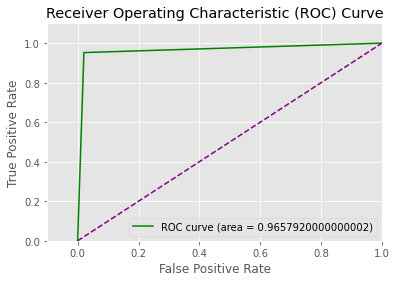

In [73]:
# Use the forest's predict method on the test data
y_pred_test_smote = xgb_gridSearchCV_best_alpha_smote.predict(X_testTree_smote)
y_pred_tng_smote = xgb_gridSearchCV_best_alpha_smote.predict(X_tngTree_smote)

# Calculate the confusion matrix
confusionRFCBal = confusion_matrix(y_testTree_smote, y_pred_test_smote)
print('For balanced classes, the RFC confusion matrix is:')
print(confusionRFCBal)

# Determine the ROC characteristics/values
fprRFCBal, tprRFCBal, _ = metrics.roc_curve(y_testTree_smote, y_pred_test_smote)

# Calculate the AUC
aucRFCBal = metrics.auc(fprRFCBal, tprRFCBal)
print('For balanced classes, the RFC AUC is: {}'.format(aucRFCBal))

plt.style.use('ggplot')
plt.plot(fprRFCBal, tprRFCBal, color='green', label='ROC curve (area = {})'.format(aucRFCBal))
plt.plot([0, 1], [0, 1], color='purple', linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Compare the XGBoost Model Tree Training and Test Error (Balanced Classes)

In [74]:
# Training and Test mean-absolute-error
tng_mae_smote = mean_absolute_error(y_tngTree_smote, y_pred_tng_smote)
test_mae_smote = mean_absolute_error(y_testTree_smote, y_pred_test_smote)

# Training and Test mean-squared-error
tng_mse_smote = mean_squared_error(y_tngTree_smote, y_pred_tng_smote)
test_mse_smote = mean_absolute_error(y_testTree_smote, y_pred_test_smote)

print("For SMOTE balanced data Training Mean Absolute Error : ", tng_mae_smote)
print("For SMOTE balanced data Test Mean Absolute Error : ", test_mae_smote)
print("For SMOTE balanced data Training Mean Squared Error : ", tng_mse_smote)
print("For SMOTE balanced data Test Mean Squared Error : ", test_mse_smote)

For SMOTE balanced data Training Mean Absolute Error :  0.03277118644067797
For SMOTE balanced data Test Mean Absolute Error :  0.034208
For SMOTE balanced data Training Mean Squared Error :  0.03277118644067797
For SMOTE balanced data Test Mean Squared Error :  0.034208


After training a XGBoost Model Tree using 10-folds cross-validation on the SMOTE balanced data set, we found our training mean absolute error and our training root mean squared error to be 0.0327. Our test mean absolute error and our test root mean squared error to be 0.0342. Although these values increased, the increase is minimal and is acceptable for our data.

### Compare the Uncompensated Case with SMOTE
The uncompensated case performed slightly better than the compensated case using SMOTE. With our uncompensated case we found our (test mean absolute error and test mean squared error to be 0.0106) and our (training root mean squared error and training mean squared error to be 0.007). For our compensated case using SMOTE we found our (test mean absolute error and test mean squared error to be 0.0342) and our (training root mean squared error and training mean squared error to be 0.0342). In comparing these values, we can see that the uncompensated case performed slightly better with lower error rates.

# ISLR
## ISLR 6.8.3
### For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.

**i. Increase initially, and then eventually start decreasing in an inverted U shape.**

**ii. Decrease initially, and then eventually start increasing in a U shape.**

**iii. Steadily increase.**

**iv. Steadily decrease.**

**v. Remain constant.**

### (a) As we increase s from 0, the training RSS will:

iv. Steadily decrease. As we increase s, the budget becomes less restrictive (more flexible) which leads to larger coefficient estimates. Eventually, these coefficient estimates become equivalent to the coefficient estimates found using the least squares method. With the same coefficients, the training RSS will steadily decrease to the least squares RSS. 

### (b) Repeat (a) for test RSS.

ii. Decrease initially, and then eventually start increasing in a U shape. As we increase s, the model starts to fit towards the test data and so the RSS wil start to decrease. However, there will become a point where overfitting occurs and so as we saw the training RSS decrease in (a), the test RSS will start to increase.

### (c) Repeat (a) for variance.

iii. Steadily increase. As we increase s, the budget becomes less restrictive and therefore there are fewer constraints. When this occurs, we are allowing for a better fit and decreasing the training RSS as seen in (a), which means that the fewer restrictions (more flexible) causes the variance to increase. This is part of the bias-variance trade off.  

### (d) Repeat (a) for (squared) bias.

iv. Steadily decrease. As we increase s, we are increasing the variance. As a part of the bias-variance trade off, the bias will decrease. Additionally, when there are fewer restrictions, bias decreases.

### (e) Repeat (a) for the irreducible error.

v. Remain constant. The irreducible error is independent of s because it is not captured by the model.


## ISLR 6.8.5
### It is well-known that ridge regression tends to give similar coefficient values to correlated variables, whereas the lasso may give quite different coefficient values to correlated variables. We will now explore this property in a very simple setting.

### Suppose that $n = 2, p = 2, x_{11} = x_{12}, x_{21} = x_{22}$. Furthermore, suppose that $y_1+y_2 = 0$ and $x_{11}+x_{21} = 0$ and $x_{12}+x_{22} = 0$, so that the estimate for the intercept in a least squares, ridge regression, or lasso model is zero: $\hat{\beta}_0 = 0$.

### (a) Write out the ridge regression optimization problem in this setting.

Ridge Regression Equation:

$\sum^n_{i=1} \bigg{(} y_i - \beta_0 - \sum^p_{j=1} \beta_j x_{ij} \bigg{)}^2 + \lambda \sum^p_{j=1} \beta^2_j$

GIVEN:

$n = p = 2$ and $\beta_0 = 0$

Ridge Regression in this setting:

$(y_1 - \hat\beta_1x_{11} - \hat\beta_2x_{12})^2 + (y_2 - \hat\beta_1x_{21} - \hat\beta_2x_{22})^2 + \lambda (\hat\beta_1^2 + \hat\beta_2^2)$

### (b) Argue that in this setting, the ridge coefficient estimates satisfy $\hat{\beta}_1$ = $\hat{\beta}_2$.

From Part (a):

$(y_1 - \hat\beta_1x_{11} - \hat\beta_2x_{12})^2 + (y_2 - \hat\beta_1x_{21} - \hat\beta_2x_{22})^2 + \lambda (\hat\beta_1^2 + \hat\beta_2^2)$

Let $x_{11} = x_{12} = x_{1}$ and let $x_{21} = x_{22} = x_{2}$ such that: 

$(y_1 - \hat\beta_1x_{1} - \hat\beta_2x_{1})^2 + (y_2 - \hat\beta_1x_{2} - \hat\beta_2x_{2})^2 + \lambda (\hat\beta_1^2 + \hat\beta_2^2)$

Now expand the equation:

$(y_1^2 + \hat\beta_1^2 x_{1}^2 + \hat\beta_2^2 x_{1}^2 - 2 \hat\beta_1 x_{1} y_1 - 2 \hat\beta_2 x_{1} y_1 + 2 \hat\beta_1 \hat\beta_2 x_{1}^2) + (y_2^2 + \hat\beta_1^2 x_{2}^2 + \hat\beta_2^2 x_{2}^2 - 2 \hat\beta_1 x_{2} y_2 - 2 \hat\beta_2 x_{2} y_2 + 2 \hat\beta_1 \hat\beta_2 x_{2}^2) + \lambda \hat\beta_1^2 + \lambda \hat\beta_2^2$

Take the partial derivitive with respect to $\hat\beta_1$, set it equal to 0, and simplify:

$(2\hat\beta_1 x_{1}^2  - 2x_{1} y_1 - 2 \hat\beta_2 x_{1}^2) + (2\hat\beta_1 x_{2}^2 - 2x_{2} y_2 - 2\hat\beta_2 x_{2}^2) + 2\lambda \hat\beta_1 = 0$

$\hat\beta_1(x_{1}^2 + x_{2}^2) + \hat\beta_2(x_{1}^2 + x_{2}^2) - x_1y_1 -x_2y_2 + \lambda \hat\beta_1  = 0$

$\hat\beta_1(x_{1}^2 + x_{2}^2) + \hat\beta_2(x_{1}^2 + x_{2}^2) + \lambda \hat\beta_1  = - x_1y_1 - x_2y_2$

Take the partial derivitive with respect to $\hat\beta_2$, set it equal to 0, and simplify:

$(2\hat\beta_2 x_{1}^2 - 2x_{1} y_1 - 2\hat\beta_1 x_{1}^2) + (2\hat\beta_2 x_{2}^2 - 2x_2 y_2 - 2\hat\beta_1 x_{2}^2) + 2\lambda \hat\beta_2 = 0$

$\hat\beta_2(x_{1}^2 + x_{2}^2) + \hat\beta_1(x_{1}^2 + x_{2}^2) - x_1y_1 -x_2y_2 + \lambda \hat\beta_2  = 0$

$\hat\beta_2(x_{1}^2 + x_{2}^2) + \hat\beta_1(x_{1}^2 + x_{2}^2) + \lambda \hat\beta_2  = - x_1y_1 - x_2y_2$

After taking the partial derivitives, we can see that we can set them equal to each other:

$\hat\beta_1(x_{1}^2 + x_{2}^2) + \hat\beta_2(x_{1}^2 + x_{2}^2) + \lambda \hat\beta_1 = \hat\beta_2(x_{1}^2 + x_{2}^2) + \hat\beta_1(x_{1}^2 + x_{2}^2) + \lambda \hat\beta_2 $

Simplify:

$\lambda \hat\beta_1 = \lambda \hat\beta_2$

$\hat\beta_1 = \hat\beta_2$

Thus, as we can see, the ridge coefficient estimates satisfy $\hat{\beta}_1$ = $\hat{\beta}_2$.


### (c) Write out the lasso optimization problem in this setting.

Lasso Equation:

$\sum^n_{i=1} \bigg{(}y_i - \beta_0 - \sum^p_{j=1} \beta_j x_{ij} \bigg{)}^2 + \lambda \sum^p_{j=1} |\beta_j|$

Lasso in this setting:

$(y_1 - \hat\beta_1x_{11} - \hat\beta_2x_{12})^2 + (y_2 - \hat\beta_1x_{21} - \hat\beta_2x_{22})^2 + \lambda (|\hat\beta_1| + |\hat\beta_2|)$



### (d) Argue that in this setting, the lasso coefficients $\hat{\beta}_1$ and $\hat{\beta}_2$ are not unique—in other words, there are many possible solutions to the optimization problem in (c). Describe these solutions.

Using the equation from (c) above, we have

$(y_1 - \hat\beta_1x_{11} - \hat\beta_2x_{12})^2 + (y_2 - \hat\beta_1x_{21} - \hat\beta_2x_{22})^2$ subject to $(|\hat\beta_1| + |\hat\beta_2|) \leq s$

Given $x_1 + x_2 = 0$ translates to $x_1 = -x_2$, and $y_1 + y_2 = 0$ translates to $y_1 = -y_2$, let's simplify:

$(y_1 - \hat\beta_1x_{1} - \hat\beta_2x_{1})^2 + (y_2 - \hat\beta_1x_{2} - \hat\beta_2x_{2})^2 \geq 0$

$(y_1 - x_{1}(\hat\beta_1 - \hat\beta_2))^2 + (-y_1 - (-x_1)(\hat\beta_1 - \hat\beta_2))^2 \geq 0$

$(y_1 - x_{1}(\hat\beta_1 - \hat\beta_2))^2 + (-1(y_1 - x_1(\hat\beta_1 - \hat\beta_2)))^2 \geq 0$

$2(y_1 - x_{1}(\hat\beta_1 - \hat\beta_2))^2 \geq 0$

$(y_1 - x_{1}(\hat\beta_1 - \hat\beta_2))^2 \geq 0$


Since we cannot reduce further and because of the absolute values where we are subject to $(|\hat\beta_1| + |\hat\beta_2|) \leq s$, then we have $(\hat\beta_1 + \hat\beta_2) = s$ and $(\hat\beta_1 + \hat\beta_2) = -s$. This means there are many possible solutions to the optimization problem in (c). 

## ISLR 8.4.5
### Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of $X$, produce $10$ estimates of $P$(Class is Red|X): $0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7$, and $0.75$.

### There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

#### MAJORITY VOTE:  "the overall prediction is the most commonly occurring majority class"
The classification is RED for the majority vote approach because 6 of the 10 estimates are above 0.5.

#### AVERAGE PROBABILITY
The classification is GREEN for the average probability approach because the average is 0.45 (as seen below), which is less than 0.5.

In [75]:
sum([0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75])/10

0.45

## ISLR 9.7.3
### Here we explore the maximal margin classifier on a toy data set.

In [76]:
x_1 = [3,2,4,1,2,4,4]
x_2 = [4,2,4,4,1,3,1]
y = ['red','red','red','red','blue','blue','blue']

df_ISLR_973 = pd.DataFrame(
    {'X_1': x_1,
     'X_2': x_2,
     'Y': y
    })
df_ISLR_973

X_1  X_2     Y
0    3    4   red
1    2    2   red
2    4    4   red
3    1    4   red
4    2    1  blue
5    4    3  blue
6    4    1  blue

### (a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label. Sketch the observations.

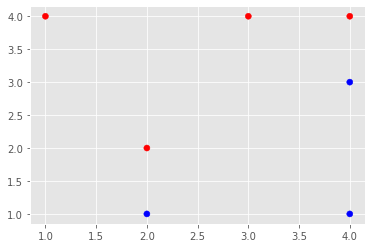

In [77]:
plt.scatter(x=x_1, y= x_2, color = y)

### (b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1)).

A hyperplane in two dimensions is a line (ISLR, p.338).

Hyperplane equation for two dimensions (9.1)
$\beta_0 + \beta_1X_1 + \beta_2X_2$ = 0

Based on the scatterplot in (a), our hyperplane needs to be in between obserations 2 (red) and 4 (blue), and 3 (red) and 5 (blue) so that can separate the red and bue classes.

obserations 2 (red) is at (2,2)

observation 4 (blue) is at (2,1)

observation 3 (red) is at (4,4)

observation 5 (blue) is at (4,3)

The midpoint between observation 2 and 4 is at (2, 1.5)

The midpoint between observation 3 and 5 is at (4, 3.5)

Therefore, the slope = $\frac{3.5-1.5}{4-2} = \frac{2}{2} = 1$

and the y-intercept ($\beta_0$) is:  $1.5 = 1(2) + \beta_0$, and so $\beta_0 = -0.5$

FINAL EQUATION:  

traditional form:  $y = x -0.5$

in the form of 9.1:  $-0.5 + X_1 - X_2 = 0$


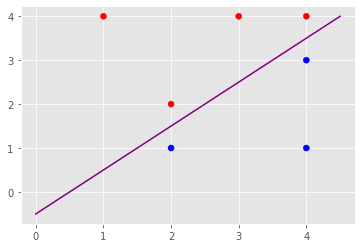

In [78]:
plt.scatter(x=x_1, y= x_2, color = y)
plt.plot([0, 4.5], [-0.5, 4], color='purple')

### (c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if $\beta_0 +\beta_1X_1 +\beta_2X_2 > 0$, and classify to Blue otherwise.” Provide the values for $\beta_0$, $\beta_1$, and $\beta_2$.

Classify to Red if $-0.5 + X_1 - X_2 \leq 0$

Classify to Blue if $-0.5 + X_1 - X_2 > 0$


### (d) On your sketch, indicate the margin for the maximal margin hyperplane.

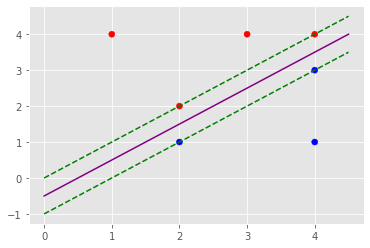

In [79]:
plt.scatter(x=x_1, y= x_2, color = y)
plt.plot([0, 4.5], [-0.5, 4], color='purple')
plt.plot([0, 4.5], [-1, 3.5], color='green', linestyle='--')
plt.plot([0, 4.5], [0, 4.5], color='green', linestyle='--')

### (e) Indicate the support vectors for the maximal margin classifier.

The support vectors are:

obserations 2 (red) is at (2,2)

observation 4 (blue) is at (2,1)

observation 3 (red) is at (4,4)

observation 5 (blue) is at (4,3)

### (f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.

Since observation 7 is not a support vector (as identified in (e), then any movement of observation 7 would not change/affect the maximal margin hyperplane.

### (g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.

The purple line in the plot below is the original separating hyperplane. The green dotted line is an example of a hyperplane that is not the optimal separating hyperplane

Equation:  $-0.8 + X_1 - X_2 > 0$

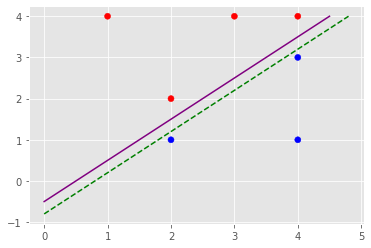

In [80]:
plt.scatter(x=x_1, y= x_2, color = y)
plt.plot([0, 4.5], [-0.5, 4], color='purple')
plt.plot([0, 4.8], [-0.8, 4], color='green', linestyle='--')

### (h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

An additional observation classified as blue was added at $X_1 = 1$, $X_2 = 2$

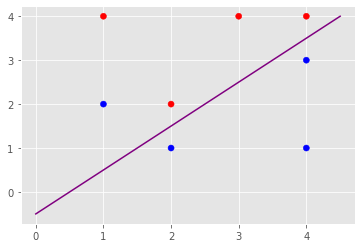

In [81]:
x_1h = [3,2,4,1,2,4,4,1]
x_2h = [4,2,4,4,1,3,1,2]
yh = ['red','red','red','red','blue','blue','blue', 'blue']

df_ISLR_973h = pd.DataFrame(
    {'X_1': x_1h,
     'X_2': x_2h,
     'Y': yh
    })

plt.scatter(x=x_1h, y= x_2h, color = yh)
plt.plot([0, 4.5], [-0.5, 4], color='purple')